# EEG explore
2021.6.8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa as lib

## Overview

In [2]:
df = pd.read_csv(r'data\Epileptic Seizure Recognition.csv')
df.drop('Unnamed', axis=1, inplace=True)

In [6]:
label = df.loc[:, 'y'].values
label[label > 1] = 0
print('"0":nornal. "1":epilepsy')
label

"0":nornal. "1":epilepsy


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [7]:
data = df.drop('y', axis=1)
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [3]:
data_nor = df[df['y']!=1].drop('y', axis=1)
data_nor.reset_index(drop=True, inplace = True)
data_epi = df[df['y']==1].drop('y', axis=1)
data_epi.reset_index(drop=True, inplace = True)
data_epi

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
1,-278,-246,-215,-191,-177,-167,-157,-139,-118,-92,...,-386,-400,-379,-336,-281,-226,-174,-125,-79,-40
2,-167,-230,-280,-315,-338,-369,-405,-392,-298,-140,...,415,423,434,416,374,319,268,215,165,103
3,410,451,491,541,581,641,736,757,692,435,...,409,415,428,463,510,562,607,667,748,763
4,-264,-189,-117,-45,20,70,111,143,161,179,...,-227,-231,-221,-248,-321,-444,-530,-548,-536,-486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,98,107,121,143,166,184,185,174,153,132,...,-74,-31,11,48,77,95,107,111,110,119
2296,267,409,450,416,334,248,173,113,67,30,...,510,413,288,173,76,7,-27,-46,-58,-67
2297,-22,-64,-121,-201,-292,-336,-398,-527,-773,-1069,...,354,183,-152,-499,-577,-415,-223,-88,-18,-61
2298,-27,-53,-84,-104,-131,-171,-199,-203,-177,-142,...,-136,-127,-114,-99,-79,-56,-28,-14,-8,-12


In [23]:
data_nor

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
2,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
3,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
4,55,28,18,16,16,19,25,40,52,66,...,-6,-12,-31,-42,-54,-60,-64,-60,-56,-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,-39,-16,-13,-14,-68,-84,-92,-61,-89,-86,...,-88,-102,-75,-63,-44,-66,-49,-34,-31,-52
9196,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
9197,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
9198,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [4]:
timeline = np.linspace(0, 1, 178)

In [ ]:
timeline = np.linspace(0, 1, 178)
count_nor = count_epi =0
for i in np.arange(0, 50, 1):
    if df.iloc[i, 178] != 1:
        count_nor += 1
        plt.plot(timeline, data.iloc[i], color='lightseagreen', alpha=0.1+0.9*(i+1)/50, label='normal', lw=0.3)
    else:
        plt.plot(timeline, data.iloc[i], color='lightcoral', alpha=0.1+0.9*(i+1)/50, label='epilepsy', lw=0.3)
        count_epi += 1
print(count_nor, count_epi)
# plt.savefig(r'output\Summary.png', bbox_inches = 'tight', dpi=300)

[[  386   382   356 ...   154   143   129]
 [ -278  -246  -215 ...  -125   -79   -40]
 [ -167  -230  -280 ...   215   165   103]
 ...
 [ -340  -381  -376 ...  -380  -350  -308]
 [  -31   -10     5 ...    38    35    15]
 [  512   351   -90 ...   -99  -652 -1089]]


Text(0.5, -0.23, 'Fig.2 EEG')

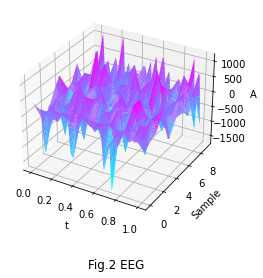

In [10]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

x, y = np.meshgrid(timeline, np.arange(0, 10, 1)) 
z = data_epi.iloc[0:10, 0:178].values
print(z)
ax.set_xlabel('t') 
ax.set_ylabel('Sample')
ax.set_zlabel('A') 


ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap ='cool', edgecolor ='none') 
ax.set_title('Fig.2 EEG',y=-0.25)


## Cross zero rate

In [125]:
x = 0

In [129]:
data_epi_N = data_epi.sub(data_epi.mean(axis=1), axis=0)

data_epi_pos = data_epi_N[data_epi_N > 0]
data_epi_neg = data_epi_N[data_epi_N < 0]

data_epi_pospeek = data_epi_N.sub(1.5*data_epi_pos.mean(axis=1), axis=0)
data_epi_negpeek = data_epi_N.sub(1.5*data_epi_neg.mean(axis=1), axis=0)

pospeek = lib.zero_crossings(np.array(data_epi_pospeek.iloc[x]))
print(pospeek)
print(np.sum(pospeek==1))

negpeek = lib.zero_crossings(np.array(data_epi_negpeek.iloc[x]))
print(negpeek)
print(np.sum(negpeek==1))

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False  True False False  True False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

X1      1365.68118
X2      1361.68118
X3      1335.68118
X4      1310.68118
X5      1299.68118
           ...    
X174    1136.68118
X175    1135.68118
X176    1133.68118
X177    1122.68118
X178    1108.68118
Name: 0, Length: 178, dtype: float64


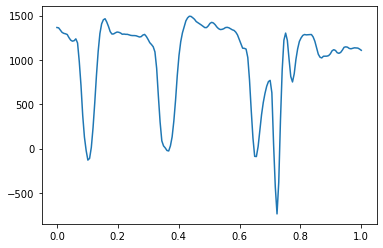

In [130]:
print(data_epi_negpeek.iloc[x])
plt.plot(timeline, data_epi_negpeek.iloc[x])

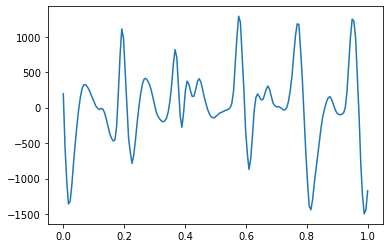

In [50]:
plt.plot(timeline, data_epi.iloc[x])

In [131]:
data_nor_N = data_nor.sub(data_nor.mean(axis=1), axis=0)

data_nor_pos = data_nor_N[data_nor_N > 0]
data_nor_neg = data_nor_N[data_nor_N < 0]

data_nor_pospeek = data_nor_N.sub(1.5*data_nor_pos.mean(axis=1), axis=0)
data_nor_negpeek = data_nor_N.sub(1.5*data_nor_neg.mean(axis=1), axis=0)

pospeek = lib.zero_crossings(np.array(data_nor_pospeek.iloc[x]))
print(pospeek)
print(np.sum(pospeek==1))

negpeek = lib.zero_crossings(np.array(data_nor_negpeek.iloc[x]))
print(negpeek)
print(np.sum(negpeek==1))

[ True False False False False False  True False False False False False
 False  True False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False  True False  True False False False
 False False False False False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False  True False False False False  True False  True
 False False False False False False False False False False False False
 False False False False False False False False Fa

X1       41.625589
X2       96.625589
X3      135.625589
X4      129.625589
X5       98.625589
           ...    
X174   -196.374411
X175   -220.374411
X176   -209.374411
X177   -176.374411
X178   -144.374411
Name: 0, Length: 178, dtype: float64


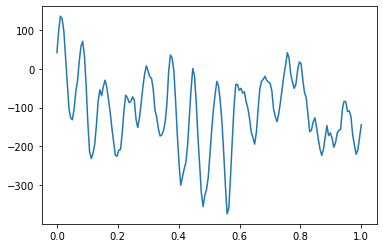

In [132]:
print(data_nor_pospeek.iloc[x])
plt.plot(timeline, data_nor_pospeek.iloc[x])

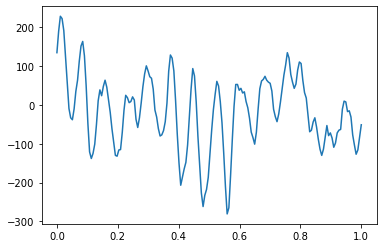

In [133]:
plt.plot(timeline, data_nor.iloc[x])

In [11]:
x = 300

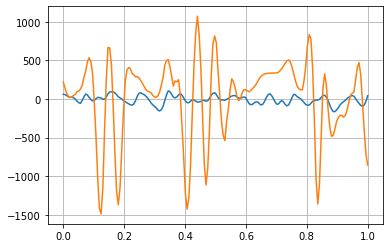

In [100]:
plt.plot(timeline, data_nor.iloc[1310])
plt.plot(timeline, data_epi.iloc[1310])
plt.grid()

# 先绝对值，然后0.9max值，然后过零，测量峰宽

In [51]:
zero_array = lib.zero_crossings(np.array(data_epi.iloc[28]))
count_zero = 0
for i in zero_array:
    if i == 1:
        count_zero += 1
print(count_zero)
print(zero_array)
print(np.mean(zero_array))

16
[ True False False  True False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False  True False False  True
 False False False False False False False False False  True False False
 False  True False False False False False  True False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False  True  True False False False False False False
 False False  True False  True False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False

In [20]:
zero_array = lib.zero_crossings(np.array(data_nor.iloc[x]))
count_zero = 0
for i in zero_array:
    if i == 1:
        count_zero += 1

print(np.mean(zero_array))
print(count_zero)
print(zero_array)   

0.1404494382022472
25
[ True False False  True False False  True False False False False False
 False False False  True  True False False False False False False False
 False False  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
  True False False False False False False False False  True False False
  True False False False False  True False  True False False False  True
 False False False False False False False False False False False False
 False False False False False False  True False False False  True False
 False False False False  True  True False False False  True False  True
 False False False False False False False False False False False False
 False False False False Fals

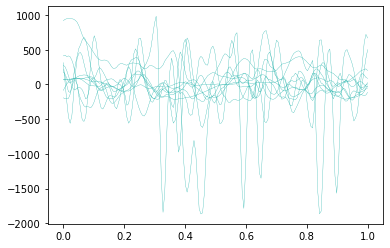

In [83]:
for i in np.arange(50, 60, 1):
    plt.plot(timeline, data_epi.iloc[i], color='lightseagreen', label='normal', lw=0.3)

In [65]:
from scipy.fftpack import fft, fftfreq
def FFT_contrast(y):
    fs = 179
    # signal
    t = timeline
    N = len(t)
    # fft
    yf = fft(y)
    xf = fftfreq(N, 1/fs)[:N//2]
    yf_nor = 2.0/N * np.abs(yf[0:N//2]) # normalization
    # return np.mean(yf_nor[np.argsort(yf_nor)[::-1][:2]])/np.mean(yf_nor) # contrast 
    return np.sum(yf_nor[0:40]>2*np.mean(yf_nor[0:40]))


In [ ]:
data_nor_N = data_nor.sub(data_nor.mean(axis=1), axis=0)

data_nor_pos = data_nor_N[data_nor_N > 0]
data_nor_neg = data_nor_N[data_nor_N < 0]

data_nor_pospeek = data_nor_N.sub(data_nor_pos.mean(axis=1), axis=0)
data_nor_negpeek = data_nor_N.sub(data_nor_neg.mean(axis=1), axis=0)

pospeek = lib.zero_crossings(np.array(data_nor_pospeek.iloc[x]))
print(pospeek)
print(np.sum(pospeek==1))

negpeek = lib.zero_crossings(np.array(data_nor_negpeek.iloc[x]))
print(negpeek)
print(np.sum(negpeek==1))

In [134]:
def nor_SUM_peek(i):
    pospeek = lib.zero_crossings(np.array(data_nor_pospeek.iloc[i]))
    negpeek = lib.zero_crossings(np.array(data_nor_negpeek.iloc[i]))
    return max(np.sum(pospeek==1), np.sum(negpeek==1))

In [ ]:
def nor_SUM_peek(i):
    pospeek = lib.zero_crossings(np.array(data_nor_pospeek.iloc[i]))
    negpeek = lib.zero_crossings(np.array(data_nor_negpeek.iloc[i]))
    return max(np.sum(pospeek==1), np.sum(negpeek==1))

In [135]:
nor_SUM_peek(0)

14

# Feature

In [6]:
feature = pd.DataFrame(columns=['peek', 'RMS', 'label'])
for i in np.arange(0, len(data_epi), 1):
    peek = SUM_peek(np.array(data_epi.iloc[i]).astype(float))
    rms = lib.feature.rms(y=np.array(data_epi.iloc[i]).astype(float))[0, 0]
    feature = feature.append(pd.DataFrame({'peek':peek, 'RMS':rms, 'label':1}, index=[i]))

KeyboardInterrupt: 

In [135]:
for i in np.arange(0, len(data_nor), 1):
    apen = ApEn(np.array(data_nor.iloc[i]).astype(float))
    rms = lib.feature.rms(y=np.array(data_nor.iloc[i]).astype(float))[0, 0]
    feature = feature.append(pd.DataFrame({'ApEn':apen, 'RMS':rms, 'label':0}, index=[i+2300]))
feature.to_csv(r'data\feature.csv')

In [79]:
feature.to_csv(r'data\feature.csv')

## Root mean squre

In [52]:
lib.feature.rms(y=np.array(data_epi.iloc[0]).astype(float))

array([[472.68264183]])

In [14]:
lib.feature.rms(y=np.array(data_nor.iloc[500]).astype(float))

array([[79.29010285]])

In [30]:
f_rms = np.array([])
for i in np.arange(0, len(data_epi), 1):
    rms = lib.feature.rms(y=np.array(data_nor.iloc[i]).astype(float))[0, 0]
    np.append(f_rms, rms))
f_rms

## Apen

In [75]:
def ApEn(U, m=30):
    r = np.std(U)
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)

    return abs(_phi(m+1) - _phi(m))

# Usage example
U = np.array([85, 80, 89] * 17)
print (ApEn(U))
# 1.0996541105257052e-05

0.0020368544103879227


In [82]:
ApEn(np.array(data_nor.iloc[1359]).astype(float))

0.016401123075890922

In [83]:
ApEn(np.array(data_epi.iloc[1359]).astype(float))

0.04333472500111624

In [96]:
# SampEn calculation

import numpy as np

def SampEn(U, m=30):
    r = np.std(U)
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        B = [(len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) - 1.0) / (N - m) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(B)

    N = len(U)

    return -np.log(_phi(m+1) / _phi(m))

# Usage example
U = np.array([85, 80, 89] *17)
print(SampEn(U))


0.010050335853501674


In [98]:
print(SampEn(np.array(data_nor.iloc[13]).astype(float)))
print(SampEn(np.array(data_epi.iloc[13]).astype(float)))

0.03069977797529917
0.05399986210963958


## fft


In [21]:
from scipy.fftpack import fft, fftfreq
def FFT(y):
    fs = 179
    # signal
    t = timeline
    N = len(t)
    # fft
    yf = fft(y)
    xf = fftfreq(N, 1/fs)[:N//2]
    yf_nor = 2.0/N * np.abs(yf[0:N//2]) # normalization
    return xf, yf_nor

In [14]:
from scipy.fftpack import fft, fftfreq
def mean_freq(y):
    fs = 178
    # signal
    t = np.linspace(0, 1, 178)
    N = len(t)
    # fft
    yf = fft(y)
    xf = fftfreq(N, 1/fs)[:N//2]
    yf_nor = 2.0/N * np.abs(yf[0:N//2]) # normalization
    xf_half = xf[:len(yf_nor)]
    return np.mean(xf_half[yf_nor.argsort()[-2:]])

In [24]:
y = np.array(data_nor.iloc[1342]).astype(float)
fs = 178
# signal
t = np.linspace(0, 1, 178)
N = len(t)
# fft
yf = fft(y)
xf = fftfreq(N, 1/fs)[:N//2]
yf_nor = 2.0/N * np.abs(yf[0:N//2]) # normalization
xf_half = xf[:len(yf_nor)]
print(xf)
print(len(yf_nor))
print(len(xf_half))
print(xf_half[yf_nor.argsort()[-2:]])
print(np.mean(xf_half[np.argsort(yf_nor)][-2:]))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.]
89
89
[8. 0.]
4.0


In [15]:
mean_freq(np.array(data_nor.iloc[1342]).astype(float))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

5
[1.20629213e+02 2.67038471e+01 6.92006006e+00 9.88543633e+00
 8.83116531e+00 8.06375691e+00 2.29018549e+00 2.10841651e+01
 3.10525159e+01 3.11475903e+00 6.04570277e+00 2.49295193e+01
 1.94576218e+01 1.45795238e+01 5.12374886e+00 1.19849419e+01
 7.70348558e+00 8.03404887e+00 9.25679471e+00 6.04880941e-02
 4.35700418e+00 6.96984911e+00 2.31671318e+00 1.22710412e+01
 5.44070661e+00 3.19720094e-01 1.29222278e+00 5.53103255e+00
 2.94092259e+00 2.86269555e+00 1.85830734e+00 3.49376397e+00
 4.68867039e-01 1.39443064e+00 2.33100426e+00 4.26343591e-01
 1.19513335e+00 2.14500216e+00 1.50424722e+00 1.19484551e+00
 2.21669024e+00 9.12693417e-01 8.10807156e-01 1.06899818e+00
 1.00910189e+00 1.01839661e+00 1.24241975e+00 1.27116832e+00
 1.15517316e+00 9.77365435e-01 1.16037018e+00 2.40780782e+00
 4.06256719e-01 6.03272831e-01 6.23029568e-01 6.68441242e-01
 6.33300449e-01 6.89321060e-01 6.37440779e-01 3.90016936e-01
 1.16900309e+00 3.89716249e-01 6.54616569e-01 5.84753704e-01
 5.00082057e-01 6.7311

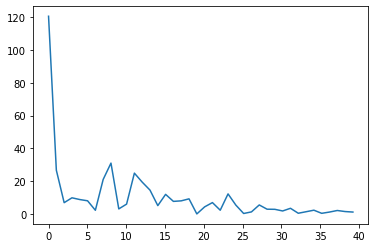

In [72]:
fft_norx, fft_nory = FFT(np.array(data_nor.iloc[1342]).astype(float))
plt.plot(fft_norx[0:40], fft_nory[0:40])
print(FFT_contrast(np.array(data_nor.iloc[1342]).astype(float)))
print(fft_nory)

6
[34.65168539  8.34874383 47.62397666 40.02758655 41.53623786 77.87816412
 85.44306086 49.71271296 47.70148595 28.62239794 37.87876372 48.13446872
 37.00970892 24.110315   10.62052923 39.42931347 13.82459076 17.63452522
  7.993031   16.80284824 12.85368511  7.4575432  15.20446353  3.2365041
  3.29955808  9.21621398 10.63017161 12.99331991  2.78586478  4.4133429
  5.31359074  3.48503118  5.02166932  2.20604125  5.92915275  2.70454021
  3.17061878  2.61435491  1.6813102   4.24074176  2.10983996  3.72117623
  2.92120203  2.82684456  2.66885045  2.61211919  2.39021015  2.07327282
  2.56921399  2.81457424  2.30704833  1.77427012  2.13951193  2.50974593
  2.4518736   2.29173541  2.06199433  2.54783293  2.48184537  2.93430016
  2.26771263  1.70005912  1.55586434  2.35781406  2.22205326  2.75340152
  1.93877559  1.95011065  1.50794653  2.11329198  1.86362451  1.56262266
  2.26709317  1.91756717  2.26467481  2.80446891  2.5796651   1.7215242
  2.10329399  2.40633444  2.25756609  1.61394842  1.

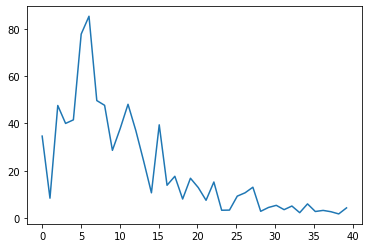

In [70]:
fft_epix, fft_epiy = FFT(np.array(data_epi.iloc[1254]).astype(float))
plt.plot(fft_epix[0:40], fft_epiy[0:40])
print(FFT_contrast(np.array(data_epi.iloc[1254]).astype(float)))
print(fft_epiy)

## other

In [64]:
lib.feature.spectral_centroid(y=np.array(data_epi.iloc[245]).astype(float), sr=1/179)

C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=178
  warnings.warn(


array([[0.00036193]])

In [65]:
lib.feature.spectral_centroid(y=np.array(data_nor.iloc[245]).astype(float), sr=1/179)

array([[0.00039881]])

In [74]:
lib.feature.spectral_flatness(y=np.array(data_epi.iloc[1300]).astype(float))

array([[0.00043498]])

In [75]:
lib.feature.spectral_flatness(y=np.array(data_nor.iloc[1300]).astype(float))

array([[0.00053928]])

In [65]:
def stEnergyEntropy(frame, n_short_blocks=10):
    """Computes entropy of energy"""
    Eol = np.sum(frame ** 2)    # total frame energy
    L = len(frame)
    sub_win_len = int(np.floor(L / n_short_blocks))
    if L != sub_win_len * n_short_blocks:
            frame = frame[0:sub_win_len * n_short_blocks]
    # sub_wins is of size [n_short_blocks x L]
    sub_wins = frame.reshape(sub_win_len, n_short_blocks, order='F').copy()

    # Compute normalized sub-frame energies:
    s = np.sum(sub_wins ** 2, axis=0) / (Eol)

    # Compute entropy of the normalized sub-frame energies:
    Entropy = -np.sum(s * np.log2(s))
    return Entropy

In [66]:
stEnergyEntropy(np.array(data_nor.iloc[1300]).astype(float))

4.684814201346687

In [67]:
stEnergyEntropy(np.array(data_epi.iloc[1300]).astype(float))

3.780393745515936

In [9]:
x = np.array([3, 4, 1, 6, 2, 8])
print(x.argsort()[-2:])

[3 5]


In [36]:
df1 = pd.read_csv(r'data\feature.csv', index_col=0)
df2 = pd.read_csv(r'data\feature2.csv', index_col=0)
df2 = df2.drop('label', axis=1)
df2

,mean frequency
0,3.5
1,5.0
2,5.5
3,7.5
4,3.0
...,...
11495,0.5
11496,4.5
11497,1.5
11498,1.5


In [38]:
df1

,ApEn,peek,RMS,label
0,0.067594,9,472.682642,1
1,0.037022,10,155.184031,1
2,0.009688,9,304.301872,1
3,0.029392,12,558.420084,1
4,0.052558,7,151.881867,1
...,...,...,...,...
11495,0.004898,25,82.982552,0
11496,0.038474,9,38.448709,0
11497,0.013952,17,44.716364,0
11498,0.005097,15,74.477978,0


In [39]:
new = pd.concat([df1, df2], axis=1)
new = new[['ApEn', 'peek', 'RMS', 'mean frequency', 'label']]
new.to_csv(r'data\feature.csv')

(2048, 1)


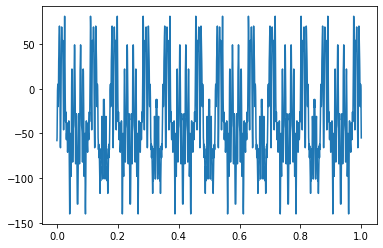

In [14]:
x = lib.util.frame(np.pad(np.array(data_nor.iloc[80]).astype(float), int(2048 // 2), mode="reflect"), frame_length=2048, hop_length=512)
plt.plot(np.linspace(0, 1, 2048), x.flatten())
print(x.shape)

In [ ]:
plt.plot(np.linspace(0, 1, 178), np.array(data_epi.iloc[600]))
plt.grid()

In [ ]:
plt.plot(np.linspace(0, 1, 178), np.array(data_epi.iloc[1310]))
plt.grid()

In [ ]:
plt.plot(np.linspace(0, 1, 89)[0:30], FFT(np.array(data_epi.iloc[130]))[0:30])
plt.grid()

In [ ]:
plt.plot(np.linspace(0, 1, 178), np.array(data_nor.iloc[3]))
plt.grid()

In [ ]:
plt.plot(np.linspace(0, 1, 89)[0:30], FFT(np.array(data_nor.iloc[3]))[0:30])
plt.grid()

In [ ]:
plt.plot(np.linspace(0, 1, 178), data_nor_pospeek.iloc[3])
plt.grid()

In [ ]:
plt.plot(np.linspace(0, 1, 178), data_nor_negpeek.iloc[3])
plt.grid()